## 2.4 パーセプトロンの限界

### 2.4.1 XOR ゲート

排他的論理和とも呼ばれる。どちらかが 1 の時だけ出力が 1 となる。

| $x_1$ | $x_2$ | $y$ |
| ---- | ---- | ---- |
| 0 | 0 | 0 |
| 1 | 0 | 1 |
| 0 | 1 | 1 |
| 1 | 1 | 0 |

実は、これまで見てきたパーセプトロンでは、XOR を実現できない


例として、OR の分類を行うグラフを描画する

$$
    y = \begin{cases}
    0 (-0.2 + 0.5x_1 + 0.5x_2 \leq 0) \\
    1 (-0.2 + 0.5x_1 + 0.5x_2 > 0)
    \end{cases}
$$

を可視化する


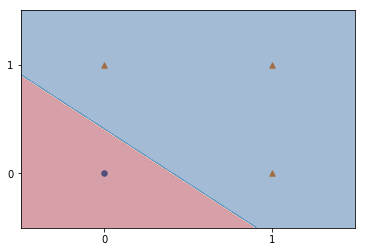

In [8]:
import numpy as np
from matplotlib import pyplot as plt
import itertools


def OR(x1, x2):

    x = np.array([x1, x2])
    w = np.array([0.5, 0.5])
    b = -0.2
    tmp = np.sum(w * x) + b
    if tmp <= 0:
        return 0
    else:
        return 1


if __name__ == "__main__":
    xs_0 = np.array([[0, 0]], dtype=np.float32)      # データ

    xs_1 = np.array([[1, 0],
                     [0, 1],
                     [1, 1]], dtype=np.float32)

    w = np.array([0, 0], dtype=np.float32)  # 重み
    
    # グラフの描画 from https://teratail.com/questions/177319
    fig, ax = plt.subplots()
    ax.set_xticks([0, 1]), ax.set_yticks([0, 1])
    ax.set_xlim(-0.5, 1.5), ax.set_ylim(-0.5, 1.5)

    # サンプルを描画する。
    ax.scatter(xs_0[:, 0], xs_0[:, 1], marker='o', s=30)
    ax.scatter(xs_1[:, 0], xs_1[:, 1], marker='^', s=30)

    # 各点の推論結果を得る。
    X, Y = np.meshgrid(np.linspace(*ax.get_xlim(), 100),
                       np.linspace(*ax.get_ylim(), 100))
    XY = np.column_stack([X.ravel(), Y.ravel()])
    Z = np.array([OR(x[0], x[1]) for x in XY]).reshape(X.shape)

    # 等高線を描画する。
    ax.contourf(X, Y, Z, alpha=0.4, cmap='RdBu')

    plt.show()


分類の境界はこのように直線となるため、分類することができる。

次にXORのグラフを見てみる

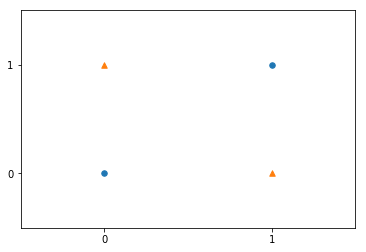

In [9]:
import numpy as np
from matplotlib import pyplot as plt

if __name__ == "__main__":
    xs_0 = np.array([[0, 0],[1, 1]], dtype=np.float32)      # データ
    xs_1 = np.array([[1, 0],[0, 1],], dtype=np.float32)

    fig, ax = plt.subplots()
    ax.set_xticks([0, 1]), ax.set_yticks([0, 1])
    ax.set_xlim(-0.5, 1.5), ax.set_ylim(-0.5, 1.5)
    
    # NANDの描画
    ax.scatter(xs_0[:, 0], xs_0[:, 1], marker='o', s=30)
    ax.scatter(xs_1[:, 0], xs_1[:, 1], marker='^', s=30)

このような形は、1本の直線のみでは分類することはできない。
### 2.4.1
このような分類するためには、曲線が必要(非線形な領域ができる)